In [2]:
import pandas as pd
import seaborn as sns
import os

In [4]:
basefolder = '/home/hu-eki/Data/BCNB/experiments'

experiments = os.listdir(basefolder)


In [5]:
experiment = experiments[0]

rounds = os.listdir(os.path.join(basefolder, experiment))
rounds

['20250216_041858', '20250216_041631', '20250216_044439', '20250216_050921']

In [8]:
all_results = []
for experiment in experiments:
    rounds = os.listdir(os.path.join(basefolder, experiment))
    for round in rounds:
        try:
            df_res = pd.read_csv(os.path.join(basefolder, experiment, round, 'results.csv'))
        except FileNotFoundError:
            print(f'No results for {experiment} round {round}')
            continue
        df_res['experiment'] = experiment
        df_res['round'] = round

        all_results.append(df_res)

df = pd.concat(all_results)

No results for Defaults+normalize_total;True,log1p;True round 20250217_051749
No results for Defaults+normalize_total;True,log1p;True round 20250217_052359
No results for Defaults+normalize_total;True,log1p;True round 20250217_064722
No results for Defaults+normalize_total;True,log1p;True round 20250217_063948
No results for Defaults+ round 20250215_154723


In [11]:
df.head()

,Model,Seed,Metric,ER,PR,HER2,experiment,round
0,finetuned_model,42,accuracy,0.848624,0.779817,0.752294,Defaults+log1p;True,20250216_041858
1,finetuned_model,42,auc,0.855653,0.793255,0.741772,Defaults+log1p;True,20250216_041858
2,finetuned_model,42,balanced_accuracy,0.761932,0.691762,0.601688,Defaults+log1p;True,20250216_041858
0,finetuned_model,42,accuracy,0.839450,0.798165,0.761468,Defaults+log1p;True,20250216_041631
1,finetuned_model,42,auc,0.858665,0.812572,0.772046,Defaults+log1p;True,20250216_041631


<Axes: xlabel='Metric', ylabel='PR'>

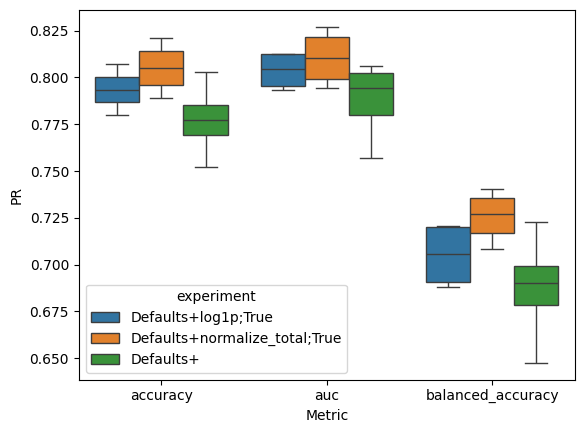

In [22]:
sns.boxplot(data=df, x='Metric', y='PR', hue='experiment')

<Axes: xlabel='Metric', ylabel='ER'>

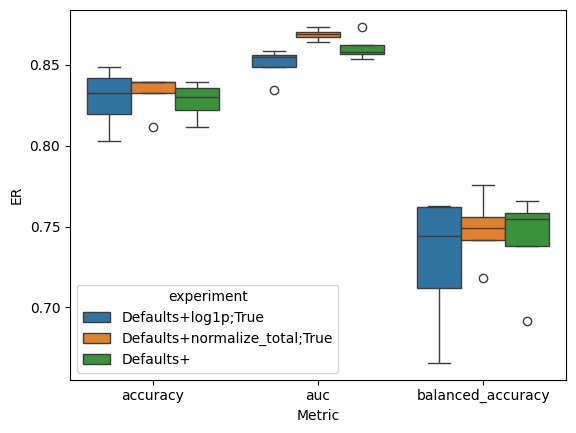

In [23]:
sns.boxplot(data=df, x='Metric', y='ER', hue='experiment')

<Axes: xlabel='Metric', ylabel='HER2'>

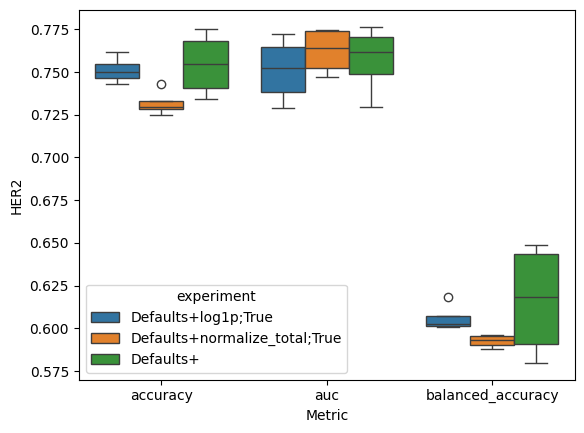

In [24]:
sns.boxplot(data=df, x='Metric', y='HER2', hue='experiment')